# 

Mia Colangelo (Colorado State University)  
Neva Morgan (Colorado State University)

## **Title:**

### **Flight in Flux:** Analyzing American Bittern (Botaurus lentiginosus) Migration Timing and Climate Change

#### **Introduction:**

Climate change poses many questions relating to systems across the globe, especially ecological and evolutionary systems. One system which could potentially be heavily impacted is migration. Bird migration timing is critical for ensuring species survival and ecological balance. As anthropogenic climate change has altered seasonal patterns, there is a potential disruption to migration timing, impacting birds’ breeding success, food availability, and overall population health. The American Bittern (Botaurus lentiginosus), for example, depends on the thriving vegetation of marshlands for camouflage and nesting, as they are known to nest on the ground. Wetland birds are expected to be affected negatively by a considerable margin with the presence of a changing climate altering their regular migratory ranges and patterns (Steen et al., 2012).

#### **Abstract:**

The American Bittern is a solitary, cryptic species that relies on wetlands for breeding and overwintering. Typically, these birds breed in freshwater marshes across Canada and the northern United States before migrating south to the southeastern U.S., Mexico, and Central America for the winter. However, increasing global temperatures, shifts in precipitation, and habitat loss due to climate change threaten to disrupt these migration patterns. Past studies on migratory birds indicate that climate change is leading to earlier spring arrivals, delayed fall departures, and shifts in overall migration routes (La Sorte & Thompson, 2007). For wetland-dependent birds like the American Bittern, changes in water levels due to altered precipitation cycles could further complicate their ability to find suitable stopover sites and breeding grounds. Given that wetlands are already among the most threatened ecosystems in North America, with significant losses due to urbanization and agriculture, climate-induced changes pose an additional challenge (Dahl, 2011). Studying the migration patterns of the American Bittern under a changing climate is essential for predicting future population trends and informing conservation strategies. By understanding how climate variables influence their movements, conservationists can prioritize habitat protection, restoration, and adaptive management to mitigate potential negative impacts.

**Motivation:** Bird migration range and timing is critical for ensuring species survival and ecological balance. However, climate change has altered seasonal patterns, potentially disrupting migration timing and impacting breeding success, food availability, and overall population health. Understanding these shifts can inform conservation strategies and mitigate risks to migratory bird species. Additionally, information gained from analyzing one species can be used to make inferences about the potential shifts in other similar species.

#### **Data**

Climate Data Online (NOAA Global Summary of the Month - U.S. Specific)

With NOAA’s Climate Data Online search, we focused on nine weather stations located between Arizona (two weather stations: Phoenix and Kingsman), California (three weather stations: Lake Tahoe, San Diego, and Santa Rosa), Oregon (two weather stations: Chiloquin and Hermiston), and Washington (two weather stations Shelton and Spokane), to map multiple points of migratory status for the American Bittern. The files were requested through eBird, and then downloaded into a readable CSV for Excel to initially portion the data into the portions necessary for our analysis. Each weather station collected data that contained the specific information for the weather station, temperature, precipitation, and wind-related metrics (of which are negligible for our testing metrics).

Variables within the Datasets contain:

-   Metadata: Station name (NAME), location (LATITUDE, LONGITUDE, ELEVATION), and observation date (DATE)

-   Climate Variables: Includes average and extreme temperatures (e.g., ADPT, ASLP, AWBT), precipitation statistics (e.g., DP01, DP10), and wind metrics (AWND)

-   Attributes and Flags: Columns such as \*\_ATTRIBUTES and logical flags provide metadata on data quality and source

-   Format: Character (station info and attribute flags), numeric (climate measures), and logical (indicator variables)

American Bittern eBird Data

This dataset was sourced from eBird and includes observations of American Bitterns (Botaurus lentiginosus) reported by citizen scientists. The dataset spans from 2000 to 2024 and includes over 70,000 observations.

-   Geographic Coverage: Arizona, California, Oregon, and Washington within the U.S.

-   Metadata: Observation Date Time Observations Started Latitude Longitude

-   Bird Details: Observation Count Breeding Code Behavior Code

-   Format: Primarily character and logical columns, with a few numeric fields (e.g., coordinates, observer count)

Beginning Mumbo Jumbo Libraries:

In [ ]:
library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::compose() masks flextable::compose()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──
✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.8     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes      1.3.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::compose()  masks flextable::compose()
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

#### **Methods**

To examine the effects climate change will have on the migratory timing of the American Bittern, we used a monthly summary of climate data from nine recorded NOAA weather stations within Arizona, California, Oregon, and Washington and observational data of their abundance within those states from eBird.

Data Acquiring:

Climate data within nine weather stations stretched between Arizona, California, Oregon, and Washington by NOAA Global Monthly Summaries, were recorded on a scale between 1947-2025. By using ‘R’ resources, we cleaned this data, removing unnecessary attributes for our study, converting units to be consistent throughout each dataset, and removing unnecessary data from past years to focus on data between 2000-2024.

Data Processing / Seasonal Aggregation:

Each weather station recorded the seasonal averages of temperature and precipitation, which were then manipulated into a cleaned version of that data, removing unnecessary wind records. With that, we created a list item, using ‘RStudio’, that combined the contents of the dataframes, to join them all together, ensuring columns and the contents of the dataframes are not duplicated or N/Aed. We then integrated a seasonal component into the data denoted by month: Winter = 12 (Dec.), 1 (Jan.), 2 (Feb.); Spring = 3 (Mar.), 4 (Apr.), 5 (May); Summer = 6 (Jun.), 7 (Jul.), 8 (Aug.); and Fall = 9 (Sep.), 10 (Oct.), 11 (Nov.). The seasonal component was also applied to the American Bittern migration dataframe, which was later converted to a tibble for later analysis.

Migratory Timing Analysis of American Bittern:

Observational data was provided to understand the timing of Bitterns within our four selected states, by grouping month and year to understand temporal patterns of their appearance based on the seasonal presence. Using a time series visualization to detect changes within the migratory patterns based on their seasonality between 2000-2024.

Comparing Seasonal Trends of Climate Variability and Bittern Observation:

To understand the correlation between seasonal changes for all the weather stations, we averaged the temperature and precipitation of each month per year. We then evaluated the long-term changes in bittern observation from plot layouts used before, by visually plotting the changes in the presence of climate seasonality.

#### Coding Methods:

1.  Create time period for seasons

In [ ]:
# Read in all climate data
AZ_kingman <- read_csv("data/Climate Data/AZ-kingman-climate.csv")

Rows: 345 Columns: 90
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (42): STATION, DATE, NAME, ADPT_ATTRIBUTES, ASLP_ATTRIBUTES, ASTP_ATTRIB...
dbl (45): LATITUDE, LONGITUDE, ELEVATION, ADPT, ASLP, ASTP, AWBT, AWND, CDSD...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 319 Columns: 82
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (38): STATION, DATE, NAME, AWND_ATTRIBUTES, CDSD_ATTRIBUTES, CLDD_ATTRIB...
dbl (41): LATITUDE, LONGITUDE, ELEVATION, AWND, CDSD, CLDD, DP01, DP10, DP1X...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 657 Columns: 96
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (45): STATION, DATE, NAME, ADPT_ATTRIBUTES, ASLP_ATTRIBUTES, ASTP_ATTRIB...
dbl (48): LATITUDE, LONGITUDE, ELEVATION, ADPT, ASLP, ASTP, AWBT, AWND, CDSD...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 849 Columns: 84
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (39): STATION, DATE, NAME, AWND_ATTRIBUTES, CDSD_ATTRIBUTES, CLDD_ATTRIB...
dbl (42): LATITUDE, LONGITUDE, ELEVATION, AWND, CDSD, CLDD, DP01, DP10, DP1X...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 322 Columns: 96
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (45): STATION, DATE, NAME, ADPT_ATTRIBUTES, ASLP_ATTRIBUTES, ASTP_ATTRIB...
dbl (48): LATITUDE, LONGITUDE, ELEVATION, ADPT, ASLP, ASTP, AWBT, AWND, CDSD...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 511 Columns: 68
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (30): STATION, DATE, NAME, CLDD_ATTRIBUTES, DP01_ATTRIBUTES, DP10_ATTRIB...
dbl (36): LATITUDE, LONGITUDE, ELEVATION, CDSD, CDSD_ATTRIBUTES, CLDD, DP01,...
lgl  (2): DYFG_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 324 Columns: 82
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (38): STATION, DATE, NAME, AWND_ATTRIBUTES, CDSD_ATTRIBUTES, CLDD_ATTRIB...
dbl (41): LATITUDE, LONGITUDE, ELEVATION, AWND, CDSD, CLDD, DP01, DP10, DP1X...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 321 Columns: 96
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (45): STATION, DATE, NAME, ADPT_ATTRIBUTES, ASLP_ATTRIBUTES, ASTP_ATTRIB...
dbl (48): LATITUDE, LONGITUDE, ELEVATION, ADPT, ASLP, ASTP, AWBT, AWND, CDSD...
lgl  (3): DYFG_ATTRIBUTES, DYHF_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 344 Columns: 88
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (41): STATION, DATE, NAME, CLDD_ATTRIBUTES, DP01_ATTRIBUTES, DP10_ATTRIB...
dbl (45): LATITUDE, LONGITUDE, ELEVATION, CDSD, CDSD_ATTRIBUTES, CLDD, DP01,...
lgl  (2): DYFG_ATTRIBUTES, DYTS_ATTRIBUTES

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

1.  BUILDING SEASONS!:

In [ ]:
# Changing into month and year

head(climate_data$DATE)

[1] "1996-07" "1996-08" "1996-09" "1996-10" "1996-11" "1996-12"

1.  Understanding the changes of average temperature and precipitation in a map!

1.  Temperature Difference between 2000 - 2024 based on seasonality

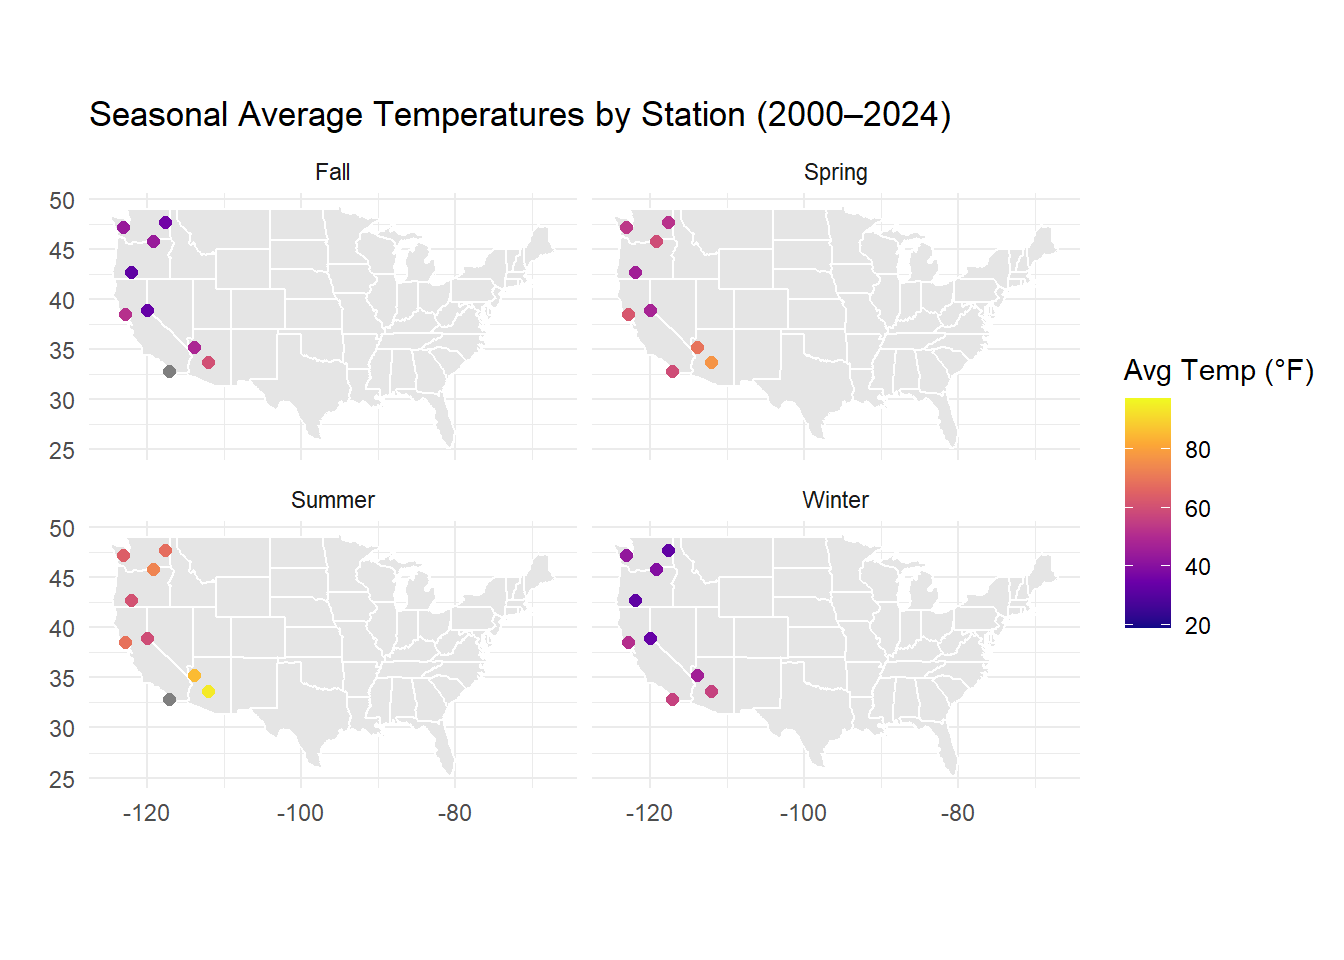

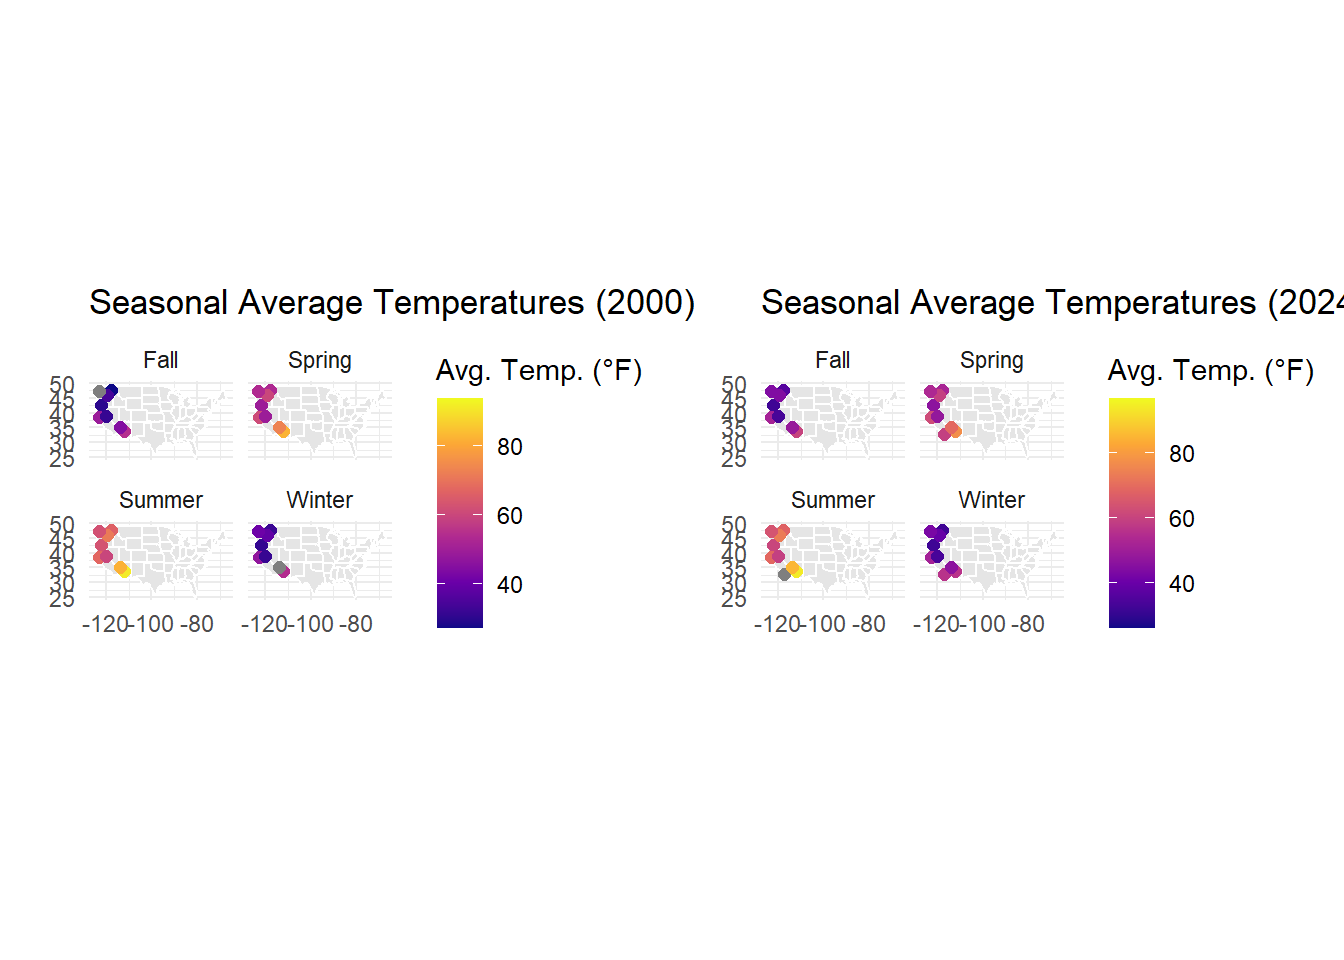

In [ ]:
#TEMPERATURE!!!


#creating a separte coordination dataframe
station_coords <- climate_data %>%
  select(STATION, LATITUDE, LONGITUDE) %>%
  distinct()

#joining the two to relay to the map
avg_temp_map <- avg_temp %>%
  left_join(station_coords, by = "STATION")

#loading the u.s. map raster file!
us_map <- map_data("state")

#Creating map of avg temperature for Selected stations based on seasonality!

ggplot(avg_temp_map %>% filter(season_year >= 2000 & season_year <= 2024)) +
  geom_polygon(data = us_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "white") +
  geom_point(aes(x = LONGITUDE, y = LATITUDE, color = avg_temp), size = 2) +
  scale_color_viridis_c(option = "plasma", name = "Avg Temp (°F)") +
  coord_fixed(1.3) +
  facet_wrap(~season) +
  labs(title = "Seasonal Average Temperatures by Station (2000–2024)",
       x = "", y = "") +
  theme_minimal()

1.  Precipitation Difference between 2000 - 2024 based on seasonality

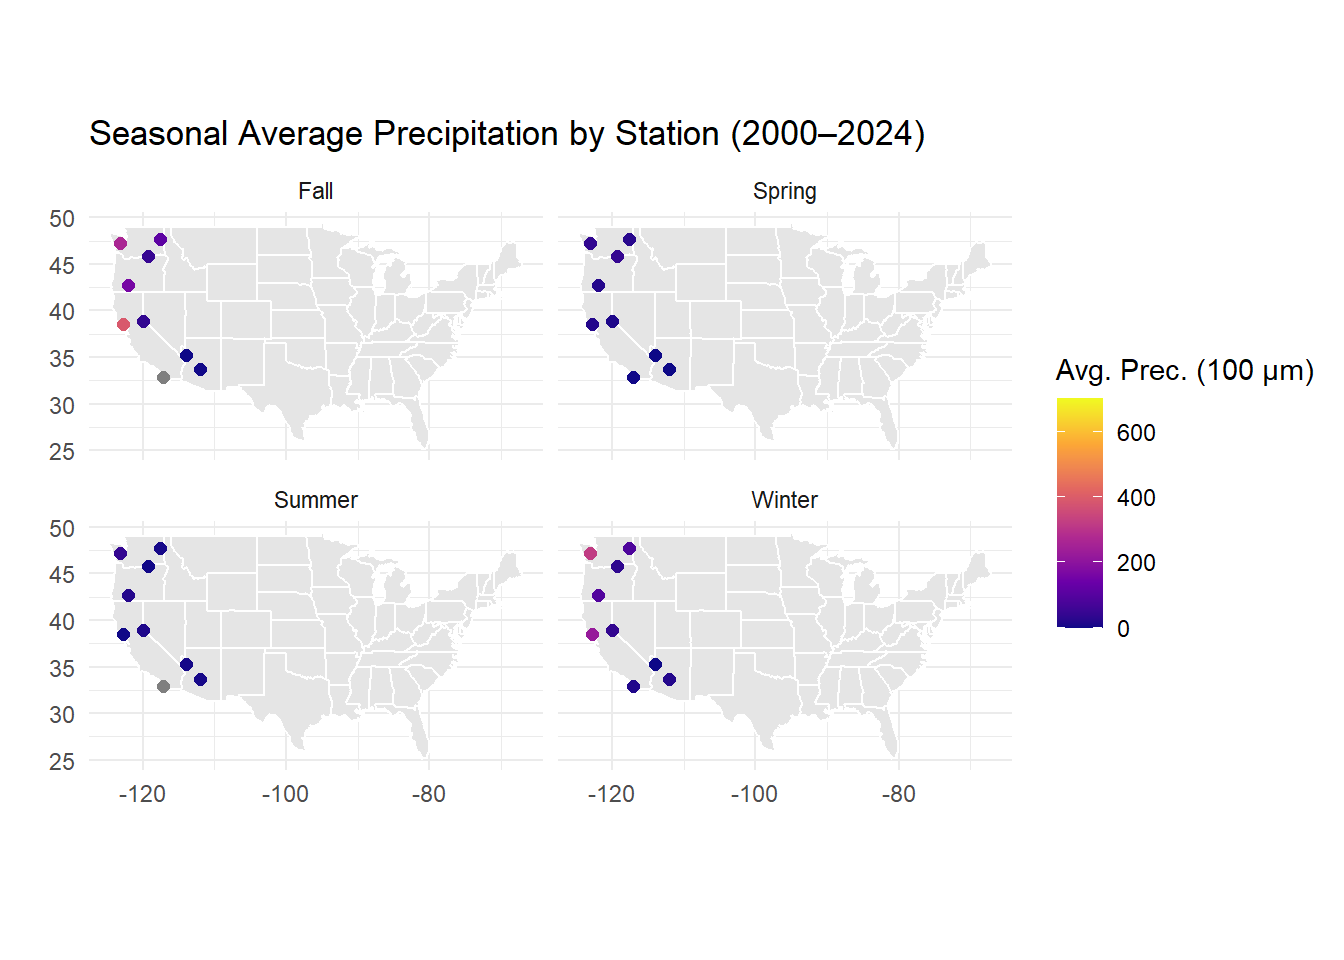

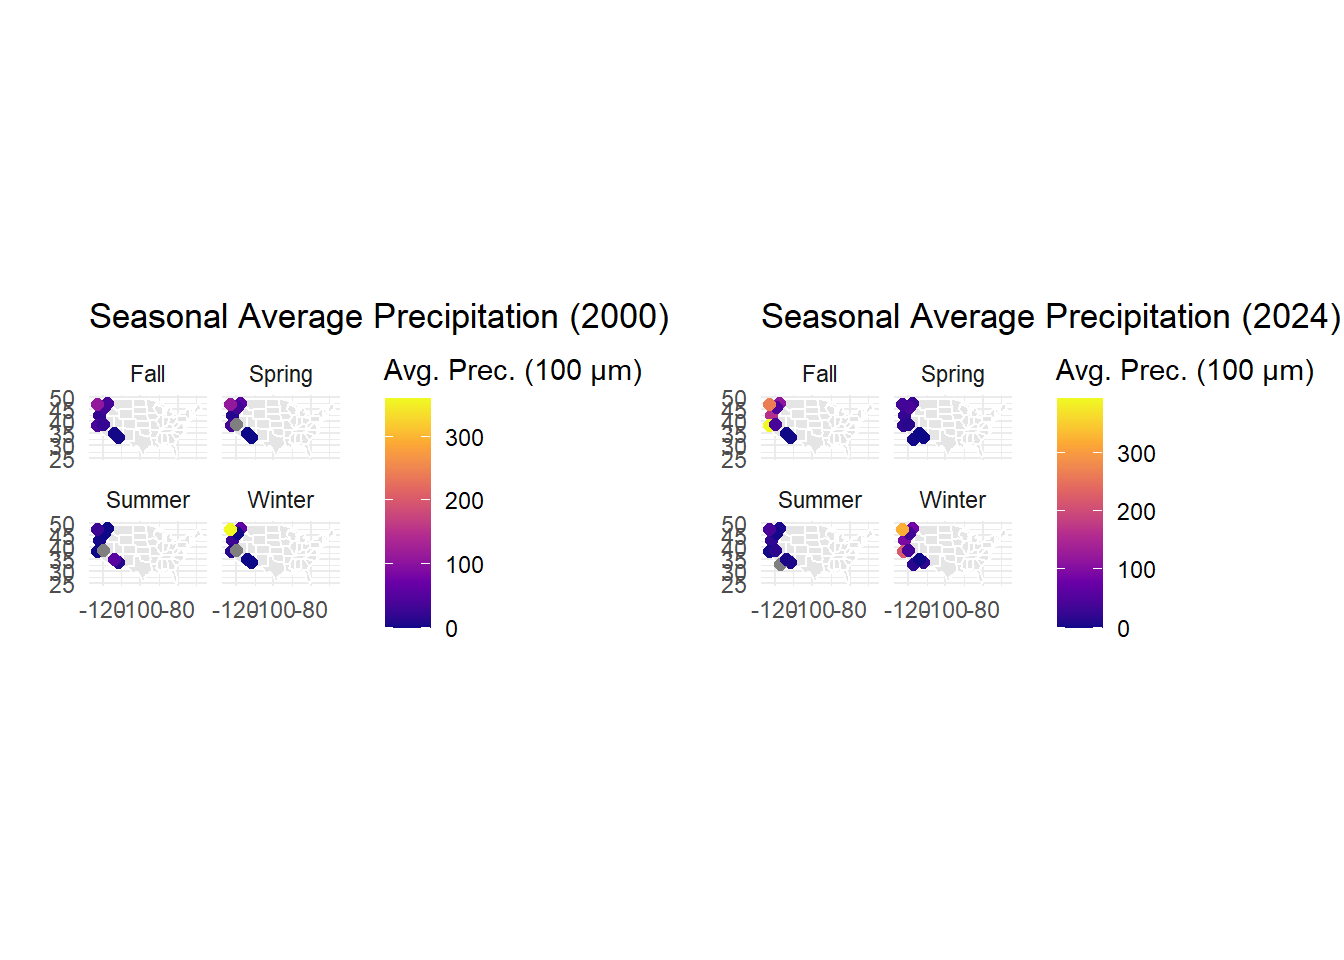

In [ ]:
#PRECIPITATION!!!

#joining the two to relay to the map
avg_prec_map <- avg_prec %>%
  left_join(station_coords, by = "STATION")

#Creating map of avg temperature for Selected stations based on seasonality!

ggplot(avg_prec_map %>% filter(season_year >= 2000 & season_year <= 2024)) +
  geom_polygon(data = us_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "white") +
  geom_point(data = avg_prec_map %>%
               filter(season_year >= 2000 & season_year <= 2024),
             aes(x = LONGITUDE, y = LATITUDE, color = avg_prec), size = 2) +
  scale_color_viridis_c(option = "plasma", name = "Avg. Prec. (100 μm)") +
  coord_fixed(1.3) +
  facet_wrap(~season) +
  labs(title = "Seasonal Average Precipitation by Station (2000–2024)",
       x = "", y = "") +
  theme_minimal()

1.  Bird migration pattern time!

Based on eBird data, we are focusing in the Western Pacific region of the U.S. (Arizona, California, Oregon, and Washington). Based on the eBird data set variables for understanding migratory codes:

New names:
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`

e.g.:
  dat <- vroom(...)
  problems(dat)

Rows: 70649 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (20): OBSERVATION DATE, OBSERVATION COUNT, BREEDING CODE, BREEDING CATE...
dbl   (4): BCR CODE, LATITUDE, LONGITUDE, NUMBER OBSERVERS
lgl  (30): AGE/SEX, ...22, ...28, ...29, ...30, ...31, ...32, ...33, ...34, ...
time  (1): TIME OBSERVATIONS STARTED

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

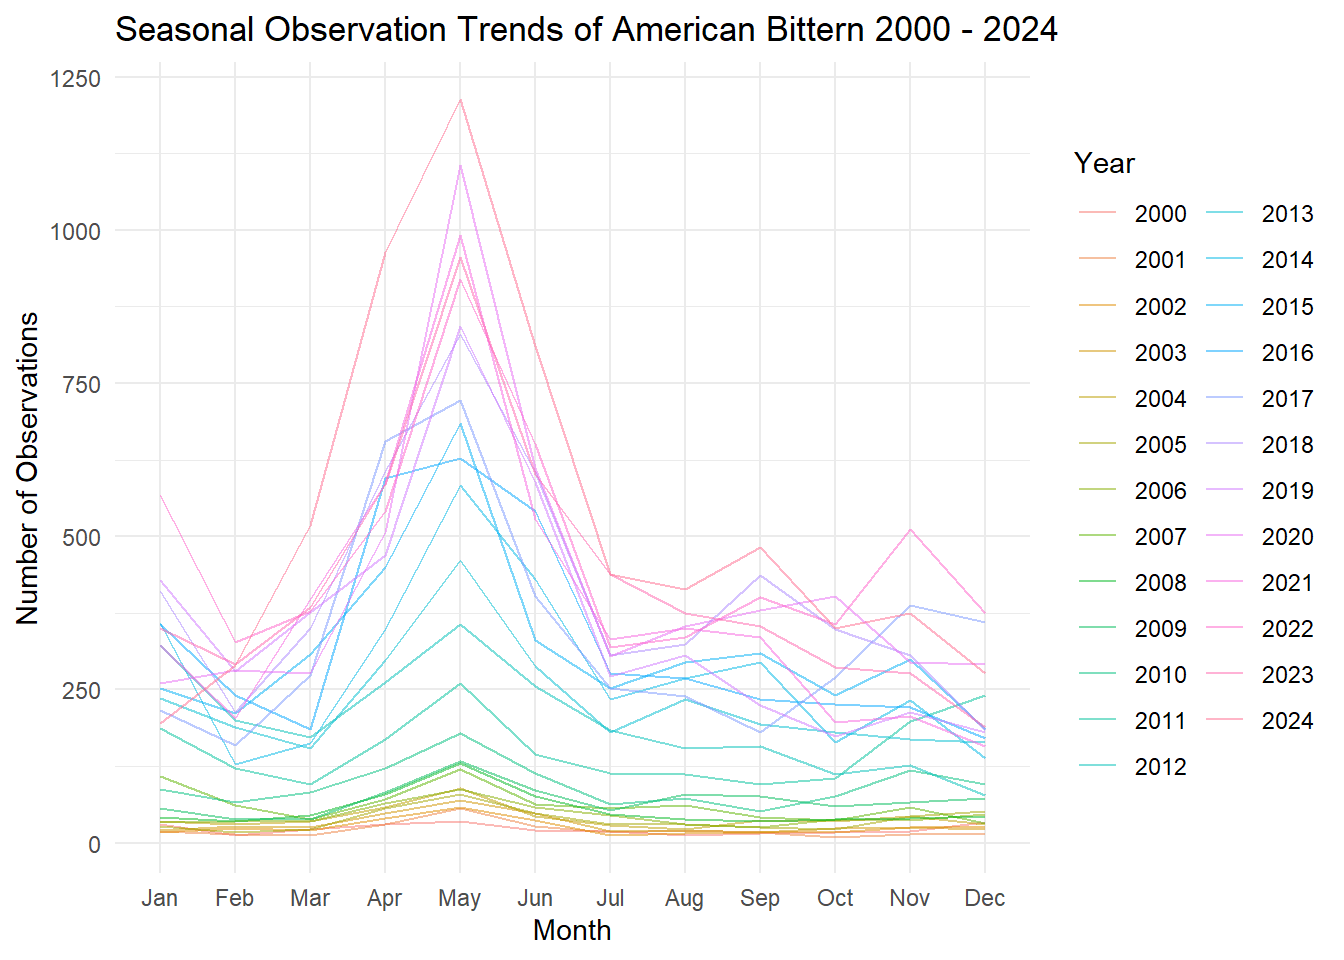

In [ ]:
# read in bird data:

amebit_data <- read_csv("data/AB Data/amebit_data.csv")

1.  Looking at seasonal changes over time

ℹ Please use `linewidth` instead.

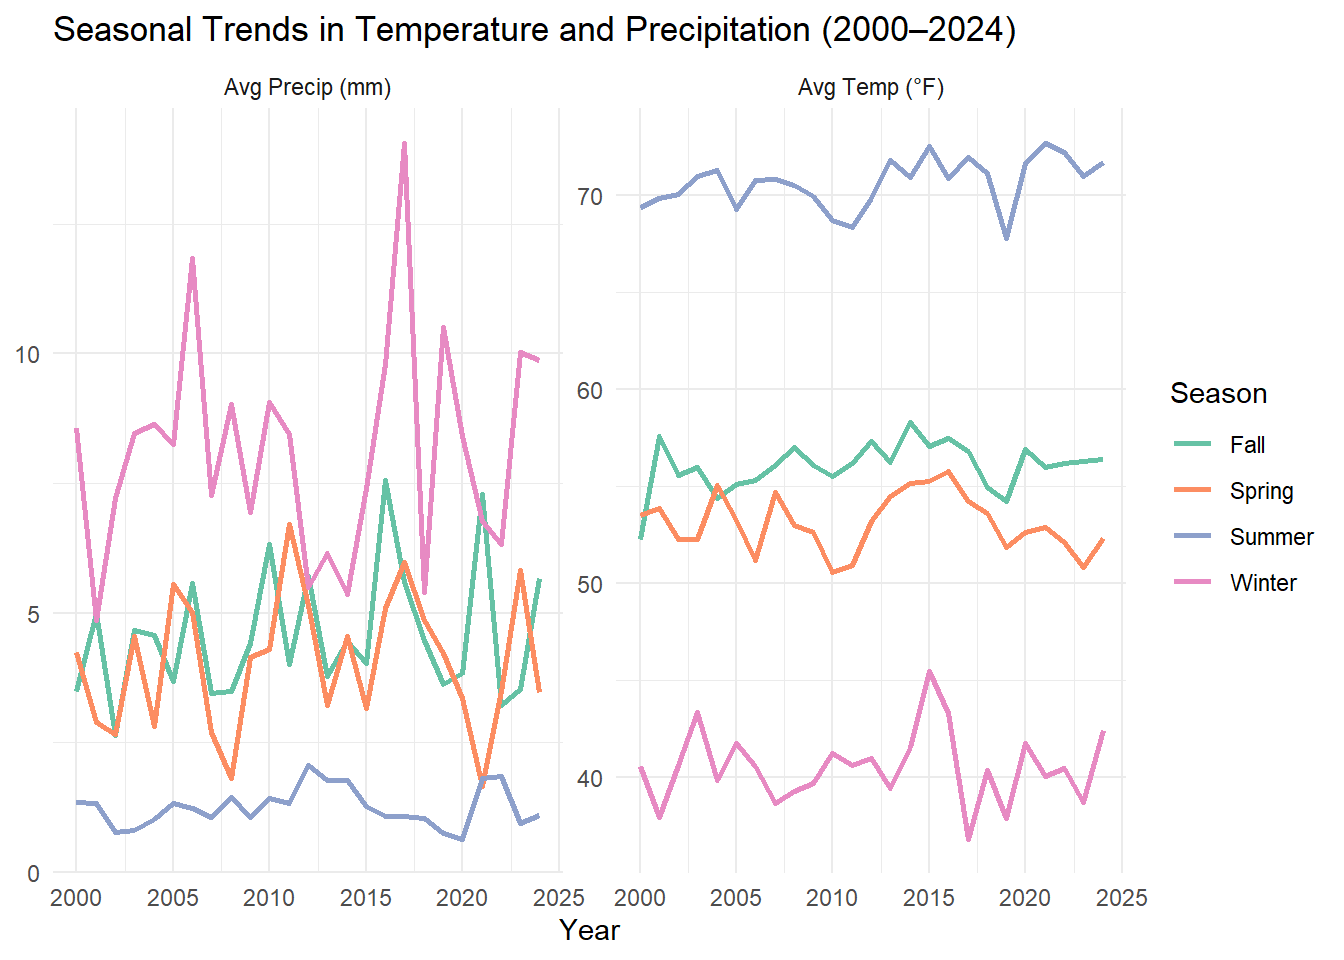

In [ ]:
seasonal_summary <- climate_data %>%
  mutate(
    TAVG_F = (TAVG * 9/5) + 32,       # Convert temp to Fahrenheit
    PRCP_mm = PRCP / 10               # Convert tenths of mm to mm
  ) %>%
  group_by(season_year, season) %>%
  summarize(
    avg_temp = mean(TAVG_F, na.rm = TRUE),
    avg_precp = mean(PRCP_mm, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(season_year >= 2000, season_year <= 2024)


# Reshaping to make plotting easier to understand shifts in Temp and Precip!

long_summary <- seasonal_summary %>%
  pivot_longer(cols = c(avg_temp, avg_precp),
               names_to = "variable", values_to = "value")


# Plotting:

ggplot(long_summary, aes(x = season_year, y = value, color = season)) +
  geom_line(size = 1) +
  facet_wrap(~ variable, scales = "free_y", 
             labeller = as_labeller(c(avg_temp = "Avg Temp (°F)", avg_precp = "Avg Precip (mm)"))) +
  labs(
    title = "Seasonal Trends in Temperature and Precipitation (2000–2024)",
    x = "Year", y = NULL
  ) +
  scale_color_brewer(palette = "Set2", name = "Season") +
  theme_minimal()

1.  Let’s combine them to see if there is a difference!

`geom_smooth()` using formula = 'y ~ x'

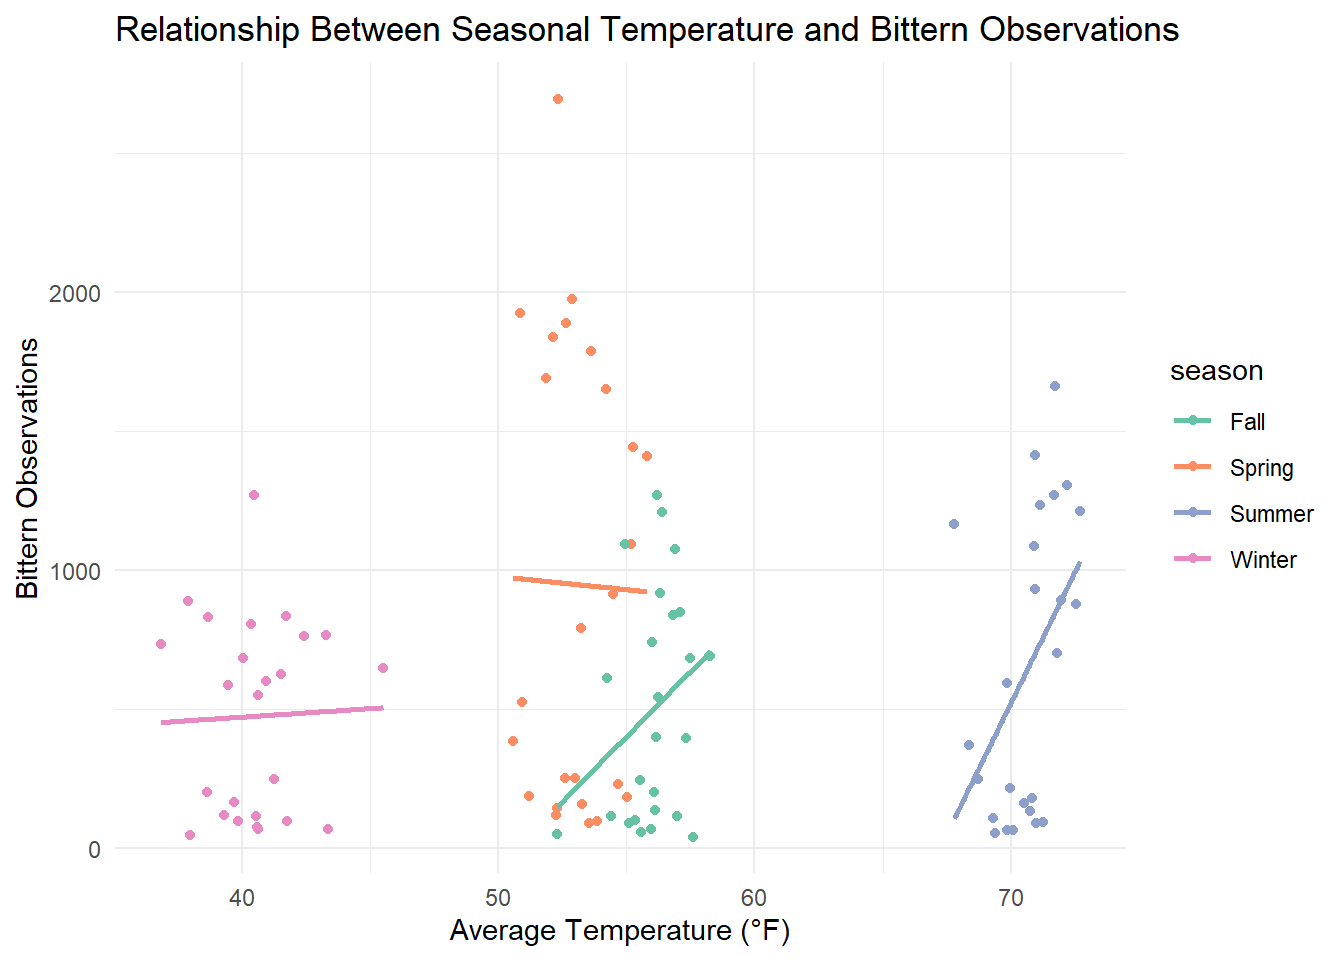

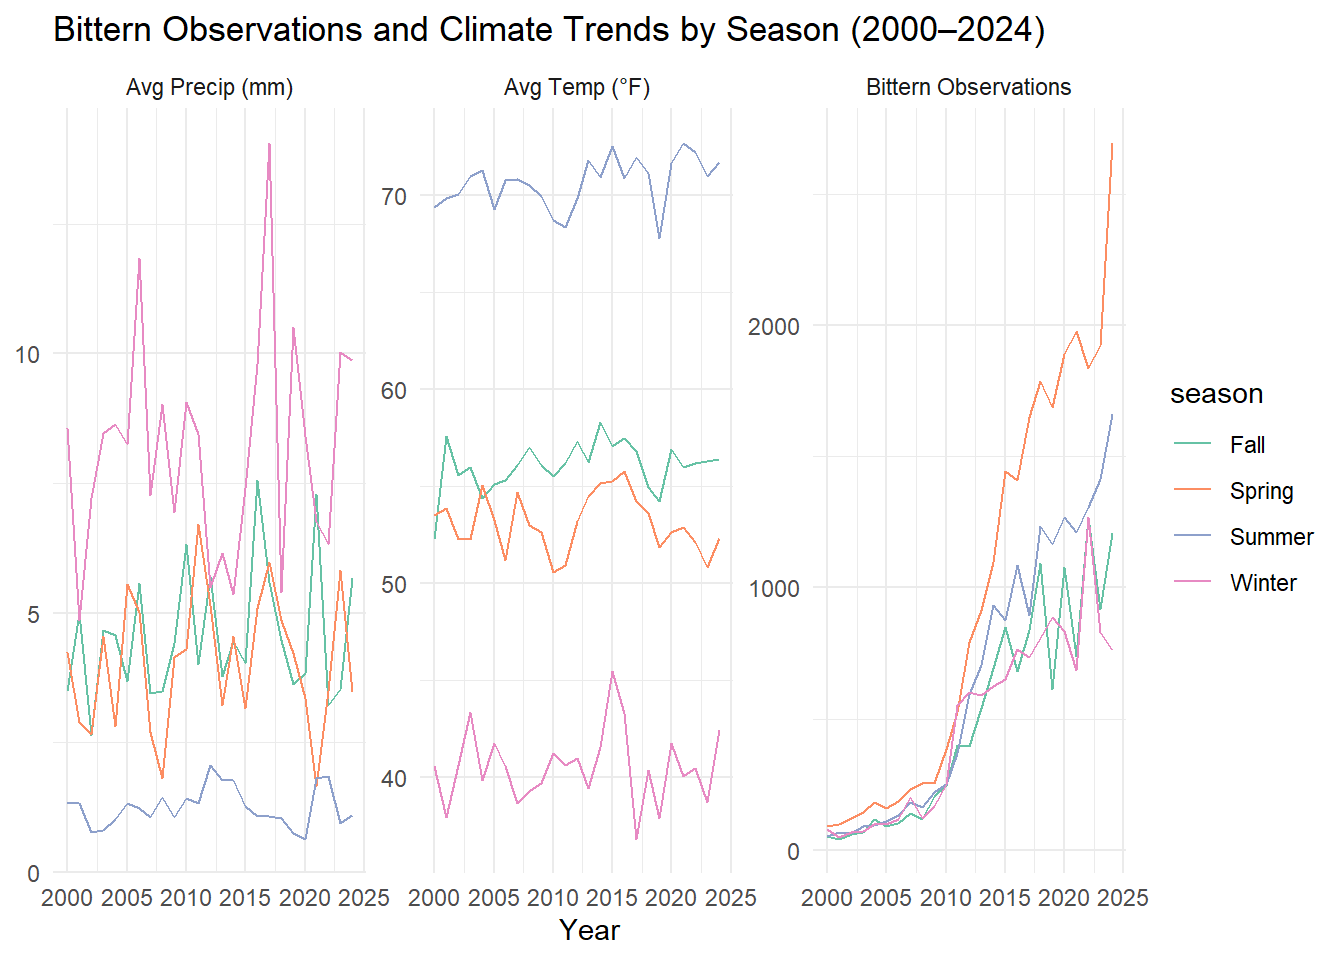

In [ ]:
# Adding seasonality to American Bittern data:

amebit_season <- amebit_monthly %>%
  mutate(season = case_when(
    month %in% c("Dec", "Jan", "Feb") ~ "Winter",
    month %in% c("Mar", "Apr", "May") ~ "Spring",
    month %in% c("Jun", "Jul", "Aug") ~ "Summer",
    month %in% c("Sep", "Oct", "Nov") ~ "Fall"
  )) %>%
  group_by(year, season) %>%
  summarize(total_obs = sum(observations), .groups = "drop")


# Merging the climate data and bittern data

combined_data <- left_join(amebit_season, seasonal_summary, 
                           by = c("year" = "season_year", "season"))


# Visualize climate and bittern data:

ggplot(combined_data, aes(x = avg_temp, y = total_obs, color = season)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Relationship Between Seasonal Temperature and Bittern Observations",
    x = "Average Temperature (°F)",
    y = "Bittern Observations"
  ) +
  scale_color_brewer(palette = "Set2") +
  theme_minimal()

#### **Results:**

Precipitation in Fall, Winter, and Spring varied greatly from year to year, and the Fall and Winter seasons show an overall increase in the past 25 years. Spring and Summer show a less dramatic decrease.

All seasons but Spring showed a several degree increase in average temperature since 2000,

The correlation graph displays the relationship between average seasonal temperature (°F) and the number of Bittern observations, with separate linear trends plotted for each season. The visualized data reveals distinct seasonal patterns in both temperature and observations.

During Winter, average temperatures ranged from approximately 37°F to 47°F, with Bittern observations generally below 1,000. A slight positive trend was noted, suggesting a weak relationship between increasing temperature and higher observations. In Spring, temperatures were around 50°F to 58°F. Although this season had the highest overall number of Bittern observations—with some counts exceeding 2,000—there was a slight negative trend in the linear fit, indicating that the number of Bittern observations tended to decrease slightly with increasing temperature. Fall showed a moderate positive trend, with observations increasing alongside temperatures ranging from 52°F to 59°F. However, overall observations remained lower compared to Spring and Summer. Summer displayed the strongest positive trend. As temperatures increased from 67°F to 74°F, Bittern observations increased significantly. This season also showed more consistent and clustered high observations, suggesting a stronger relationship between higher temperatures and increased presence of Bitterns.

#### **Discussion:**

These results suggest that seasonal temperature plays a variable role in Bittern observations, likely reflecting differences in migratory behavior, breeding activity, and habitat use throughout the year.

The strong positive trend in Summer may indicate that Bitterns are more active or easier to observe during warmer months, potentially due to breeding activity or greater availability of wetland habitats. Similarly, the positive trend in Fall could reflect pre-migration behavior or favorable foraging conditions as temperatures cool.

The Spring season, despite having the highest individual observation counts, showed a slight negative trend. This may reflect a peak in migration or nesting activity occurring at lower spring temperatures, after which observations decline as temperatures rise.

Winter observations were consistently low, which aligns with the species’ known migratory behavior—many populations leave colder regions during winter months. The weak positive correlation may suggest that in relatively milder winters, some individuals remain present or return earlier.

Overall, this analysis underscores how temperature and seasonality can influence bird detection and presence. Further investigation into habitat variables, precipitation, and food availability could clarify the mechanisms behind these seasonal patterns. Understanding these relationships is especially important in the context of climate change, which may shift seasonal temperature regimes and, in turn, influence Bittern migration and habitat use.

#### **References:**

Status and trends of wetlands in the conterminous United States 2004 to 2009. US Department of the Interior, US Fish and Wildlife Service, Fisheries and Habitat Conservation.

eBird. (2025). eBird: An online database of bird distribution and abundance \[web application\]. eBird, Cornell Lab of Ornithology, Ithaca, New York. Available: http://www.ebird.org. (Accessed: April 16, 2025).

La Sorte, F. A., & Thompson III, F. R. (2007). Poleward shifts in winter ranges of North American birds. Ecology, 88(7), 1803-1812.